# Lab project preparation


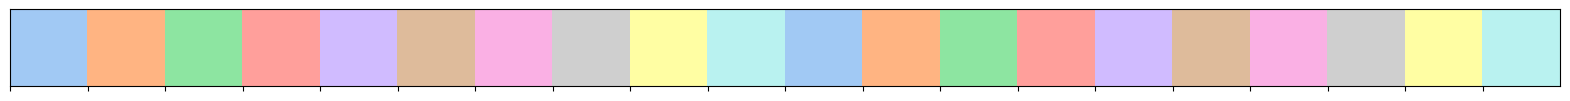

In [50]:
import numpy as np
import matplotlib as mpl
from iminuit import Minuit
import seaborn as sns
import sys
from scipy import stats
import matplotlib.pyplot as plt

colors = sns.color_palette('pastel', 20, desat =1)
sns.set_palette(colors)
sns.palplot(colors)

In [51]:
r = np.random

save_plots = False # For now, don't save plots (once you trust your code, switch on)
verbose = True     # For now, print a lot of output (once you trust your code, switch off)
Nverbose = 10      # But only print a lot for the first 10 random numbers

mpl.rcParams['font.size'] = 18      # Set the general plotting font size

In [52]:


def accel_fit(x_data, a, b):
    f = 0.5*a*x_data**2 + b * x_data
    return f



___
Jeppe
___


[-0.00034, 0.27647, 0.45851, 0.6078, 0.7275]

array([0.     , 0.27681, 0.45885, 0.60814, 0.72784])

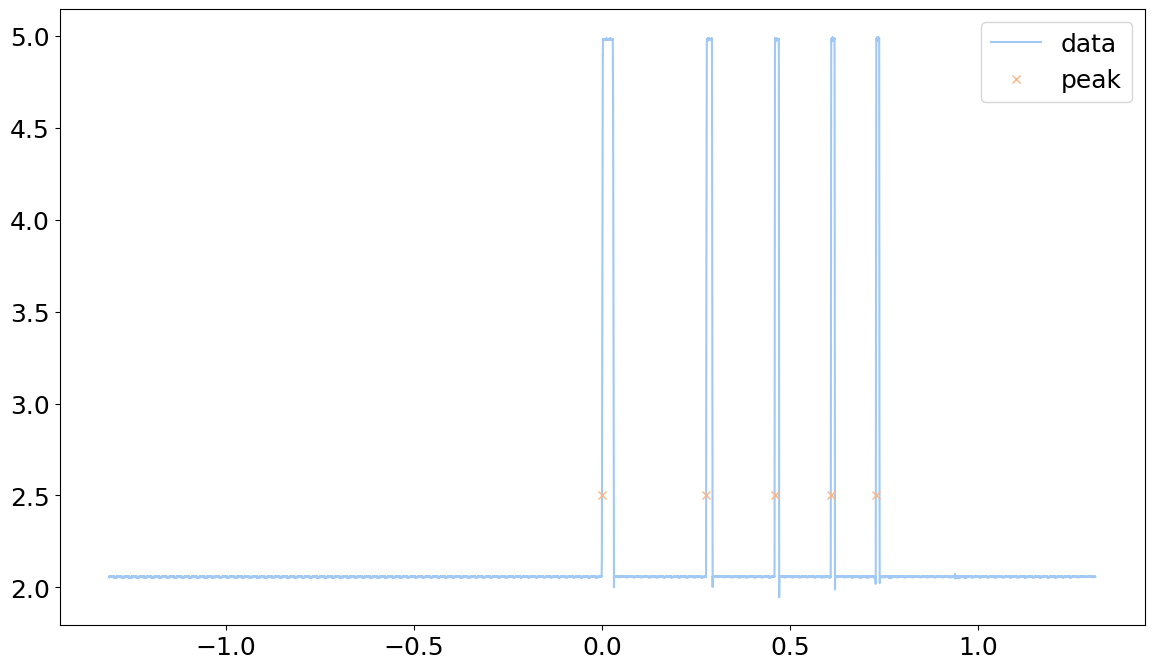

In [53]:
#data = np.genfromtxt('data.txt', delimiter= '')
data = np.genfromtxt('exp_R_L_LARGE.csv', delimiter = ',')
time = data[:,0]
voltage = data[:,1]

lens = np.array([14.65,32.45,50.57,69.35,83.82])*1e-2
elens = np.array([0.1,0.1,0.1,0.1,0.1])*1e-2
lens_laser = np.array([0.172,0.351,0.531,0.7190,0.896]) #Averaged over Niels og Robin Laser
lens_laser = lens_laser-lens_laser[0] #set detector 1 at x=0
lens = lens-lens[0]

time_exp =[]
for i in range(len(voltage) - 1):
    if voltage[i] <= 2.5 and voltage[i+1] > 2.5:
        time_exp.append(time[i])
    
display(time_exp)
# if len(time_exp)> 5:
#      time_exp= time_exp[:5]

#time_exp.pop()
time_exp = np.array(time_exp-time_exp[0])
fig,ax = plt.subplots(figsize = (14,8))
ax.plot(time, voltage, label= 'data')
ax.plot(time_exp, np.ones(5)*2.5, 'x', label = 'peak')
ax.legend()
display(time_exp)


Fit value: a = 1.55901 +/- 0.01392
Fit value: b = 0.42652 +/- 0.00437
Chi2 value: 3.0   Ndof = 3    Prob(Chi2,Ndof) = 0.396


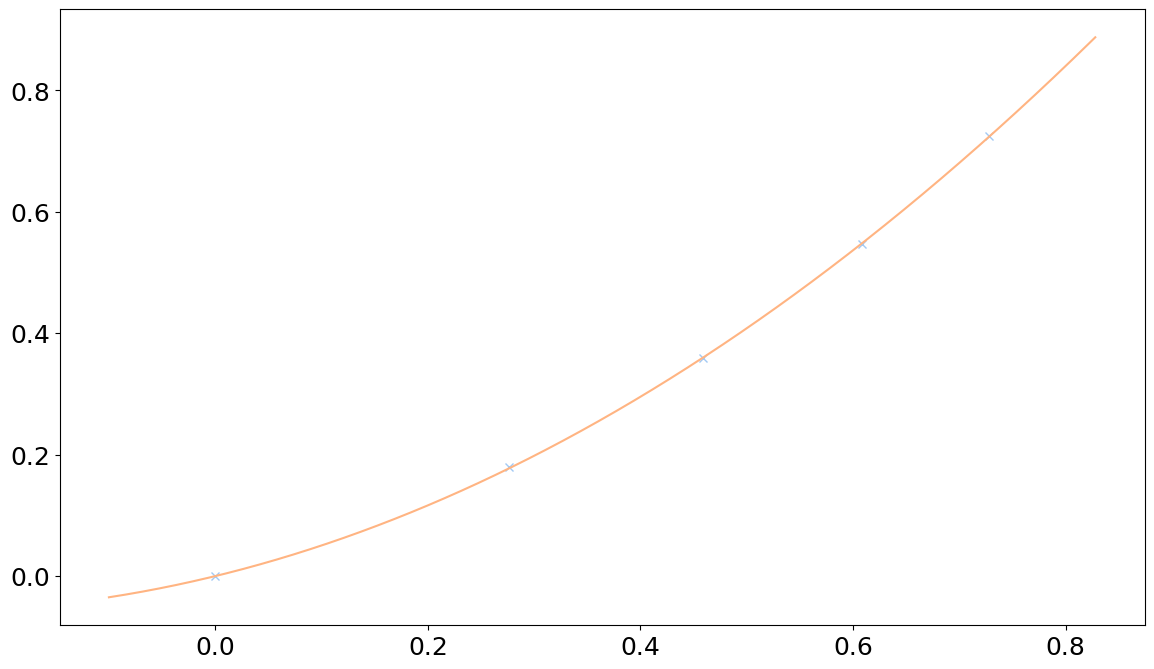

In [54]:

fig, ax = plt.subplots(figsize = (14,8))
#time_exp = np.array(time_exp) 
ax.plot(time_exp, lens_laser, 'x')

ax.errorbar(time_exp, lens_laser, yerr = elens, fmt = 'none')



def chi2_owncalc(a, b) :
    y_fit = accel_fit(time_exp, a, b)
    chi2 = np.sum(
        (lens_laser - y_fit)**2/
        elens**2
    )
        
    return chi2


minuit_chi2 = Minuit(chi2_owncalc, a=1.3, b=1)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output

for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")


# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(time_exp > 0)
Ndof_value = len(time_exp) - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")
X = np.linspace(time_exp.min() -0.1, time_exp.max()+0.1, 1000)
ax.plot(X, accel_fit(X, *minuit_chi2.values[:]))



In [55]:
def angle_from_trig(length, height):
    return np.arctan(height/length)

def eangle_from_trig(length, d_length, height, d_height):
    return np.sqrt(
        (length/(length**2 + height**2)*d_height)**2
        +
        (height/(length**2 + height**2)*d_length)**2
    )



In [56]:
#height of setup
height = 22.30e-2
eheight = 0.1e-2
#length of setup
length = 90.2e-2
elength = 0.1e-2

# print(angle_from_trig(ll,hh))
# print(eangle_from_trig(ll,d_ll, hh, d_hh))
#sp.N(sp.deg(0.24236838453429252))




In [57]:
#angle and error for experiments right to left, done with protracter [rad]
angle_R_L = 13.9*2*np.pi/360
eangle_R_L = 0.5*2*np.pi/360
#angle and error for experiments left to right, done with protracter [deg]
angle_L_R = 13.9*2*np.pi/360
eangle_L_R = 0.1*2*np.pi/360

theta = angle_from_trig(length,height) # measured angle [rad]
etheta = eangle_from_trig(length,elength, height, eheight)  # estimated error on angle [rad]
acc = minuit_chi2.values[0] # acceleration from fit [ms^-2]
eacc = minuit_chi2.errors[0] # error from fit [ms^-2]
dia_Large = 0.015  # measuered diameter of large ball [m]
edia_large = 0.0005  # estimated error on diatmer of ball [m]
dia_small = 12.7*1e-3 # measuered diameter of small ball [m]
edia_small = 0.0005  # estimated error on diatmer of ball [m]
rail_gap = 0.0057  # measuered gap of rail [m]
erail_gap = 0.0005 # estimated error on rail [m]

#d_theta = 0.0005839522540269826





In [58]:


def g(a,theta,dia,rail_gap):
    return ((a/np.sin(theta)) * (1 + (2/5)*(dia**2)/(dia**2-rail_gap**2)))

def eg(acc,t,dia,rail_gap,eacc,etheta,edia,erail_gap):
    dg_dr = 4/5*acc*dia*rail_gap**2/(np.sin(theta)*5*(dia**2-rail_gap**2)**2)
    dg_dt = np.cos(t)/np.sin(t)**2*acc*(2*dia**2/(5*(dia**2-rail_gap**2))+1)
    dg_dD = 4/5*acc*dia**2*rail_gap/(np.sin(theta)*5*(dia**2-rail_gap**2)**2)
    dg_da = (1/np.sin(theta)) * (1 + (2/5)*(dia**2)/(dia**2-rail_gap**2))
    #return ((dg_dr*erail_gap)**2+(dg_dD*edia)**2+(dg_da*eacc)**2+(dg_dt*etheta)**2)**0.5
    return np.abs(dg_da*eacc), np.abs(dg_dt*etheta),np.abs(dg_dD*edia),np.abs(dg_dr*erail_gap)


In [59]:
print(g(minuit_chi2.values["a"],theta,dia_Large,rail_gap))
print(eg(minuit_chi2.values['a'],theta,dia_Large,rail_gap,minuit_chi2._errors['a'],etheta,edia_large,erail_gap))

9.532633443800204
(0.08508491495109063, 0.041497830950086974, 0.017983455108585948, 0.006833712941262661)
